<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08

<a id='p1'></a>
## I.- Problema 01


<img src="https://www.svgrepo.com/show/253022/car.svg" width = "300" align="center"/>



El conjunto de datos, denominado `vehiculos_procesado_con_grupos.csv`, contiene algunas de las características más importantes de los vehículos. El objetivo de este ejercicio es clasificar los vehículos en diferentes categorías, basándonos en las características que se describen a continuación.

El desafío de este ejercicio radica en la combinación de variables numéricas y categóricas, lo que añade complejidad al análisis.

Lo primero que haremos será cargar el conjunto de datos:

**Descripción de los Datos:**

| **Nombre de la Columna**   | **Descripción**                                                                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **year**                   | El año en que el vehículo fue fabricado.                                                                                                          |
| **desplazamiento**          | La capacidad volumétrica del motor en litros. Indica la cantidad de aire y combustible que puede desplazar el motor durante una revolución.       |
| **cilindros**               | El número de cilindros que tiene el motor. Los cilindros son las cámaras donde ocurre la combustión interna en los motores de los vehículos.       |
| **co2**                     | Emisiones de dióxido de carbono del vehículo, medido en gramos por kilómetro. Es una medida de las emisiones de gases de efecto invernadero.       |
| **clase_tipo**              | La clase o tipo de vehículo, como vehículos especiales, deportivos, etc.                                                                         |
| **traccion_tipo**           | Tipo de tracción del vehículo, ya sea tracción en dos ruedas, en cuatro ruedas o en todas las ruedas.                                             |
| **transmision_tipo**        | Tipo de transmisión del vehículo, como automática, manual, entre otros.                                                                          |
| **combustible_tipo**        | Tipo de combustible que utiliza el vehículo, como gasolina, diésel, eléctrico, híbrido, etc.                                                     |
| **tamano_motor_tipo**       | Clasificación del tamaño del motor (por ejemplo, pequeño, mediano o grande), que generalmente se basa en la capacidad de desplazamiento.           |
| **consumo_tipo**            | Clasificación del nivel de consumo de combustible del vehículo, indicando si es alto, bajo, o muy alto.                                           |
| **co2_tipo**                | Clasificación de las emisiones de CO2 del vehículo, indicando si es alto, bajo, o muy alto.                                                       |
| **consumo_litros_milla**    | El consumo de combustible del vehículo, medido en litros por milla. Indica la eficiencia del vehículo en términos de consumo de combustible.        |



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline

sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**.

In [ ]:
# 1. Normalizar datos numéricos
numeric_data = df.select_dtypes(include='number')
numeric_data = numeric_data.fillna(numeric_data.mean())
# Normalizar los datos utilizando MinMaxScaler
scaler = MinMaxScaler()
normalized_numeric_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)

In [ ]:
# 2. Codificar variables categóricas
categorical_data = df.select_dtypes(include='object')
encoded_categorical_data = pd.get_dummies(categorical_data)

In [ ]:
# 3. Combinar ambos datasets
df_procesado = pd.concat([normalized_numeric_data, encoded_categorical_data], axis=1)
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,0.000000,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0.029412,0.243590,0.142857,0.424351,0.360294,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,0.029412,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,0.088235,0.410256,0.285714,0.424351,0.360294,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# 1. Ajuste del modelo KMeans con 8 clusters
kmeans = KMeans(n_clusters=8, random_state=42)
df_procesado['cluster'] = kmeans.fit_predict(df_procesado)

# 2. Calcular valor de los centroides para cada cluster
centroides = kmeans.cluster_centers_

# 3. Resumen de las principales cualidades de cada cluster

# Valor promedio de las variables numéricas
resumen_promedio = df_procesado.groupby('cluster').mean()

# Modo para las variables numéricas (puedes aplicar la moda en función de las características específicas que estés manejando)
resumen_moda = df_procesado.groupby('cluster').agg(lambda x: x.value_counts().index[0])

# Mostrar los resúmenes
print("Resumen de Promedios por Cluster:")
print(resumen_promedio)

print("\nResumen de Modas por Cluster:")
print(resumen_moda)


Resumen de Promedios por Cluster:
             year  desplazamiento  cilindros       co2  consumo_litros_milla  \
cluster                                                                        
0        0.375242        0.314568   0.244567  0.354655              0.281424   
1        0.695630        0.178857   0.150271  0.240158              0.156818   
2        0.440116        0.361599   0.287553  0.354467              0.281434   
3        0.523869        0.250495   0.195088  0.304375              0.226729   
4        0.412004        0.576146   0.420130  0.506937              0.449663   
5        0.438752        0.159481   0.141102  0.242174              0.156452   
6        0.476203        0.446766   0.325461  0.410605              0.344917   
7        0.723894        0.352271   0.282857  0.352779              0.279733   

         clase_tipo_Camionetas  clase_tipo_Coche Familiar  \
cluster                                                     
0                     0.203967             


El análisis de los clusters revela patrones distintivos entre los grupos de vehículos. Las características promedio, como el desplazamiento del motor, el número de cilindros y las emisiones de CO2, muestran diferencias notables entre los clusters, lo que indica la existencia de categorías claras basadas en el tamaño y la eficiencia de los vehículos. Además, la moda de las variables categóricas sugiere que ciertos tipos de vehículos, como los coches medianos o aquellos con consumo bajo, predominan en determinados grupos.

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

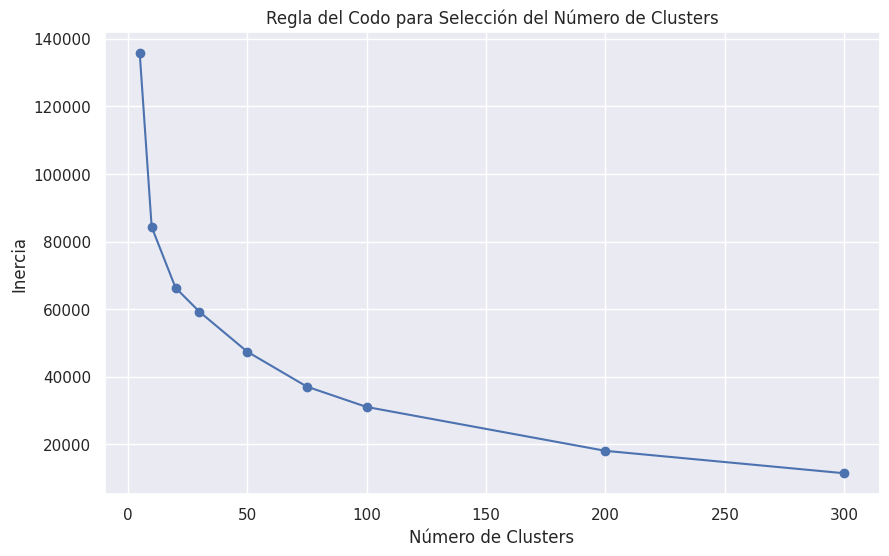

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definir los números de clusters a evaluar
clusters = [5, 10, 20, 30, 50, 75, 100, 200, 300]

# Lista para almacenar la inercia de cada número de clusters
inercias = []

# Calcular el modelo KMeans para cada valor de clusters y almacenar la inercia
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_procesado)
    inercias.append(kmeans.inertia_)

# Graficar la inercia contra el número de clusters
plt.figure(figsize=(10, 6))
plt.plot(clusters, inercias, marker='o')
plt.title('Regla del Codo para Selección del Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

Se puede apreciar en el grafico que la curva comienza a aplanarse alrededor de los 50 clusters, ya que despues de ese valor, la reduccion de la inercia es menos significativa.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases).



In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
dataset = load_iris()

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris['species'] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

Varianza explicada por PCA: [0.92461872 0.05306648]


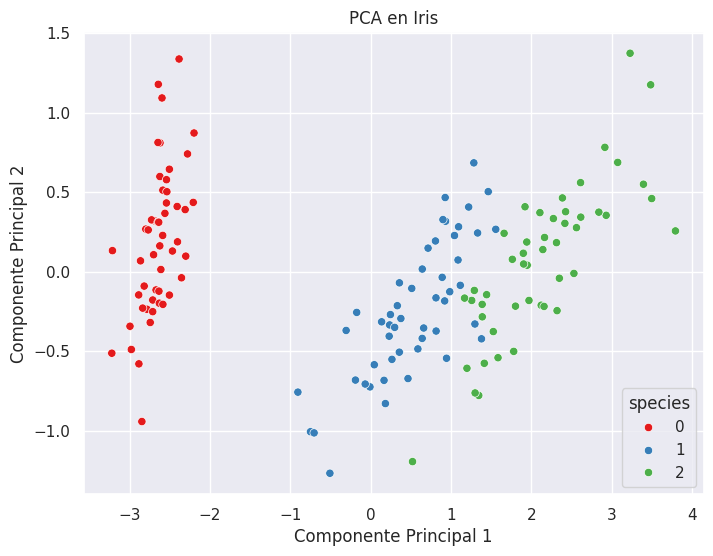

In [ ]:
# PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris[features])

# Mostrar varianza explicada
print(f'Varianza explicada por PCA: {pca.explained_variance_ratio_}')

# Visualizar PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=iris['species'], palette='Set1')
plt.title("PCA en Iris")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


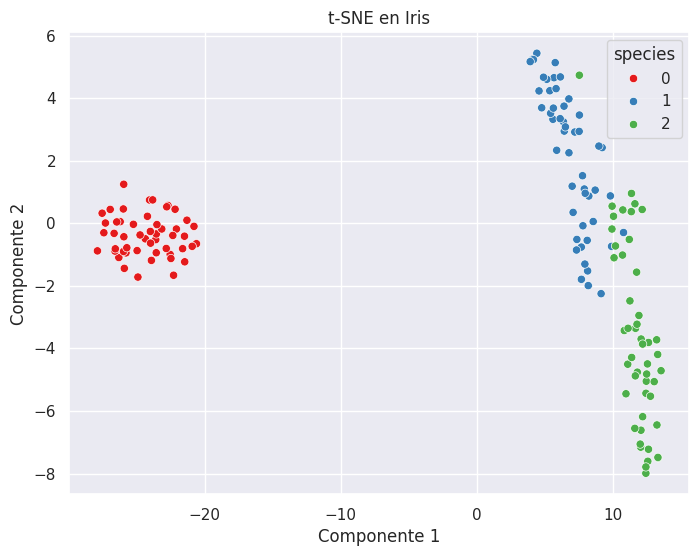

In [ ]:
# t-SNE
from sklearn.manifold import TSNE

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(iris[features])

# Visualizar t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=iris['species'], palette='Set1')
plt.title("t-SNE en Iris")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


La comparación entre PCA y t-SNE para el conjunto de datos de Iris, observamos diferencias claras en la forma en que los algoritmos proyectan los datos en dos dimensiones. PCA retiene la mayor cantidad de varianza de los datos (92.46% en la primera componente y 5.31% en la segunda), lo que proporciona una visión global de las relaciones entre las características, pero las especies se superponen, especialmente las especies 1 y 2 (versicolor y virginica). t-SNE, por otro lado, se enfoca en preservar las relaciones locales entre los puntos y muestra una separación mucho más clara entre las tres especies, con grupos bien definidos y sin superposiciones.

En conclusión, si el objetivo es maximizar la varianza y tener una interpretación más lineal de las características, PCA es una buena opción. Sin embargo, si la visualización de la estructura de los clusters es crucial, t-SNE es más adecuado, ya que ofrece una separación más nítida entre las especies, siendo más útil para observar la agrupación natural de los datos.






